# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

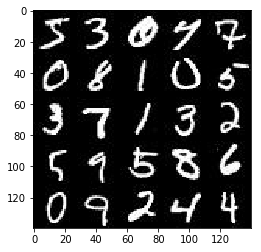

In [2]:
show_n_images = 25
0
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

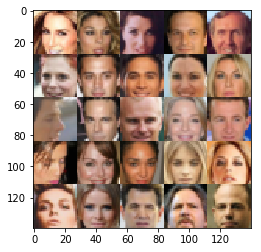

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.1.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    input_image_tensor=tf.placeholder(tf.float32,shape=(None,image_width,image_height,image_channels),name="input_image_tensor")
    z_tensor=tf.placeholder(tf.float32,shape=(None,z_dim),name="z_tensor")
    learning_rate_tensor=tf.placeholder(tf.float32,shape=(None),name="learning_rate_tensor")
    return input_image_tensor,z_tensor,learning_rate_tensor


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False, alpha=0.1):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """

    # TODO: Implement Function
    with tf.variable_scope('discriminator', reuse=reuse):
        # Input layer is 28x28xout_channel_dim
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
        bn1 = tf.layers.batch_normalization(x1, training=True)
        relu1 = tf.maximum(alpha * x1, x1)
        # 16x16x64
        
        x2 = tf.layers.conv2d(relu1, 128, 5, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha * bn2, bn2)
        # 8x8x128
        
        x3 = tf.layers.conv2d(relu2, 256, 5, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha * bn3, bn3)
        # 4x4x256

        # Flatten it
        flat = tf.reshape(relu3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        
        return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True, alpha=0.2):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """

    # TODO: Implement Function
    with tf.variable_scope('generator', reuse=(not is_train)):
        # First fully connected layer
        x1 = tf.layers.dense(z, 7*7*256)
        # Reshape it to start the convolutional stack
        x1 = tf.reshape(x1, (-1, 7, 7, 256))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        # 4x4x512 now
        
        x2 = tf.layers.conv2d_transpose(x1, 128, 5, strides=2, padding='same')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        # 8x8x256 now
        
        x3 = tf.layers.conv2d_transpose(x2, 64, 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha * x3, x3)
        # 16x16x128 now
        
        # Output layer
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 3, strides=1, padding='same')
        # 32x32x3 now
        
        out = tf.tanh(logits)
        
        return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim, alpha=0.2):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    generator_output=generator(input_z,out_channel_dim,alpha=alpha,is_train=True)
    discriminator_output,dicriminator_logits=discriminator(input_real,alpha=alpha)
    discriminator_fake_output,dicriminator_fake_logits=discriminator(generator_output,reuse=True,alpha=alpha)
    d_loss_real=loss(dicriminator_logits*0.9,discriminator_output,tf.ones_like)
    d_loss_fake=loss(dicriminator_fake_logits,discriminator_fake_output,tf.zeros_like)
    g_loss=loss(dicriminator_fake_logits,discriminator_fake_output,tf.ones_like)
    d_loss=d_loss_real+d_loss_fake
    
    return d_loss, g_loss

def loss(logits,labels,label_func):
    output=tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,labels=label_func(labels)))
    return output

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    
    update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    d_updates = [opt for opt in update_ops if opt.name.startswith('discriminator')]
    g_updates = [opt for opt in update_ops if opt.name.startswith('generator')]

    with tf.control_dependencies(d_updates):
        d_opt = tf.train.AdamOptimizer(learning_rate=learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)

    with tf.control_dependencies(g_updates):
        g_opt = tf.train.AdamOptimizer(learning_rate=learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
            
    return d_opt, g_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    input_real, input_z,lr_tensor = model_inputs(data_shape[1],data_shape[2],data_shape[3], z_dim)
        
    d_loss, g_loss = model_loss(input_real, input_z,data_shape[3], alpha=0.2)
        
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)    
    
    steps=0
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                batch_images *= 2.0
                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))

                # Run optimizers
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z})
                _ = sess.run(g_opt, feed_dict={input_z: batch_z})

                if steps % 10 == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i + 1, epochs),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))


                if steps % 100 == 0:
                    show_generator_output(sess,25,input_z,data_shape[3],data_image_mode)

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/10... Discriminator Loss: 3.0192... Generator Loss: 8.3319
Epoch 1/10... Discriminator Loss: 1.2783... Generator Loss: 0.6380
Epoch 1/10... Discriminator Loss: 0.8270... Generator Loss: 4.1754
Epoch 1/10... Discriminator Loss: 5.8664... Generator Loss: 0.0348
Epoch 1/10... Discriminator Loss: 3.3483... Generator Loss: 0.1051
Epoch 1/10... Discriminator Loss: 1.3867... Generator Loss: 4.9777
Epoch 1/10... Discriminator Loss: 1.4639... Generator Loss: 2.2310
Epoch 1/10... Discriminator Loss: 2.3854... Generator Loss: 2.6794
Epoch 1/10... Discriminator Loss: 1.3853... Generator Loss: 2.0413
Epoch 1/10... Discriminator Loss: 1.0771... Generator Loss: 1.4410


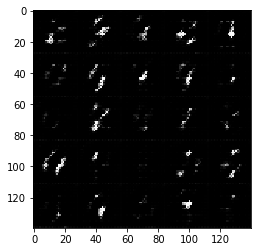

Epoch 1/10... Discriminator Loss: 1.0782... Generator Loss: 1.9396
Epoch 1/10... Discriminator Loss: 0.9732... Generator Loss: 0.9454
Epoch 1/10... Discriminator Loss: 1.8764... Generator Loss: 2.8350
Epoch 1/10... Discriminator Loss: 1.3337... Generator Loss: 1.9071
Epoch 1/10... Discriminator Loss: 1.0116... Generator Loss: 1.1913
Epoch 1/10... Discriminator Loss: 1.0887... Generator Loss: 0.7516
Epoch 1/10... Discriminator Loss: 1.7771... Generator Loss: 0.2569
Epoch 1/10... Discriminator Loss: 1.2014... Generator Loss: 0.5188
Epoch 1/10... Discriminator Loss: 0.9609... Generator Loss: 0.8145
Epoch 1/10... Discriminator Loss: 1.0701... Generator Loss: 1.5915


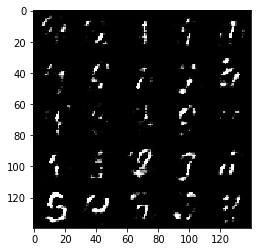

Epoch 1/10... Discriminator Loss: 0.7468... Generator Loss: 2.0481
Epoch 1/10... Discriminator Loss: 1.3377... Generator Loss: 2.1169
Epoch 1/10... Discriminator Loss: 1.5619... Generator Loss: 0.3738
Epoch 2/10... Discriminator Loss: 0.4479... Generator Loss: 1.8790
Epoch 2/10... Discriminator Loss: 1.4941... Generator Loss: 0.6422
Epoch 2/10... Discriminator Loss: 1.0557... Generator Loss: 0.8817
Epoch 2/10... Discriminator Loss: 1.1863... Generator Loss: 0.7544
Epoch 2/10... Discriminator Loss: 1.2810... Generator Loss: 1.0038
Epoch 2/10... Discriminator Loss: 1.3481... Generator Loss: 0.8463
Epoch 2/10... Discriminator Loss: 1.1930... Generator Loss: 0.6364


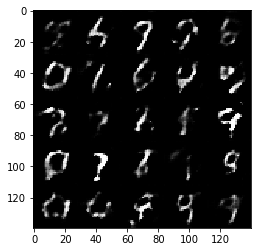

Epoch 2/10... Discriminator Loss: 1.3891... Generator Loss: 0.4758
Epoch 2/10... Discriminator Loss: 1.1145... Generator Loss: 0.7783
Epoch 2/10... Discriminator Loss: 1.3706... Generator Loss: 1.1119
Epoch 2/10... Discriminator Loss: 1.4116... Generator Loss: 0.5294
Epoch 2/10... Discriminator Loss: 1.3825... Generator Loss: 0.6004
Epoch 2/10... Discriminator Loss: 1.0822... Generator Loss: 1.0578
Epoch 2/10... Discriminator Loss: 1.1425... Generator Loss: 1.0613
Epoch 2/10... Discriminator Loss: 1.4714... Generator Loss: 2.0733
Epoch 2/10... Discriminator Loss: 1.2200... Generator Loss: 1.1890
Epoch 2/10... Discriminator Loss: 1.1951... Generator Loss: 1.2410


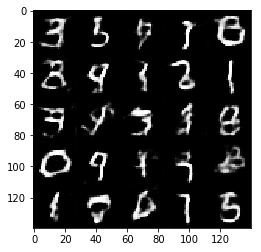

Epoch 2/10... Discriminator Loss: 1.2341... Generator Loss: 1.1473
Epoch 2/10... Discriminator Loss: 1.1966... Generator Loss: 0.9912
Epoch 2/10... Discriminator Loss: 1.1026... Generator Loss: 1.1381
Epoch 2/10... Discriminator Loss: 1.2465... Generator Loss: 1.6355
Epoch 2/10... Discriminator Loss: 1.0597... Generator Loss: 1.0599
Epoch 2/10... Discriminator Loss: 1.6380... Generator Loss: 0.4306
Epoch 3/10... Discriminator Loss: 1.1943... Generator Loss: 0.8096
Epoch 3/10... Discriminator Loss: 1.1539... Generator Loss: 0.6812
Epoch 3/10... Discriminator Loss: 1.1392... Generator Loss: 0.9325
Epoch 3/10... Discriminator Loss: 1.3839... Generator Loss: 0.5291


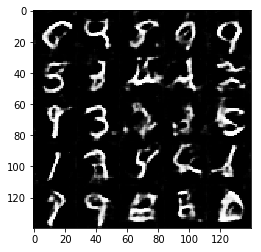

Epoch 3/10... Discriminator Loss: 1.2806... Generator Loss: 0.8033
Epoch 3/10... Discriminator Loss: 1.5408... Generator Loss: 0.4302
Epoch 3/10... Discriminator Loss: 1.1620... Generator Loss: 1.0156
Epoch 3/10... Discriminator Loss: 1.2755... Generator Loss: 0.5769
Epoch 3/10... Discriminator Loss: 1.1181... Generator Loss: 0.7078
Epoch 3/10... Discriminator Loss: 1.2303... Generator Loss: 0.6835
Epoch 3/10... Discriminator Loss: 1.2178... Generator Loss: 0.9741
Epoch 3/10... Discriminator Loss: 1.0722... Generator Loss: 0.7816
Epoch 3/10... Discriminator Loss: 1.1929... Generator Loss: 0.6321
Epoch 3/10... Discriminator Loss: 1.5448... Generator Loss: 0.4214


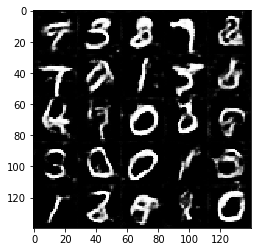

Epoch 3/10... Discriminator Loss: 1.1363... Generator Loss: 1.0222
Epoch 3/10... Discriminator Loss: 1.2746... Generator Loss: 1.8479
Epoch 3/10... Discriminator Loss: 1.1167... Generator Loss: 0.7190
Epoch 3/10... Discriminator Loss: 1.2512... Generator Loss: 0.9930
Epoch 3/10... Discriminator Loss: 1.1491... Generator Loss: 0.7187
Epoch 3/10... Discriminator Loss: 1.6177... Generator Loss: 0.3726
Epoch 3/10... Discriminator Loss: 1.1691... Generator Loss: 1.2041
Epoch 3/10... Discriminator Loss: 0.9391... Generator Loss: 0.9905
Epoch 3/10... Discriminator Loss: 1.3582... Generator Loss: 0.7690
Epoch 3/10... Discriminator Loss: 1.2537... Generator Loss: 0.5775


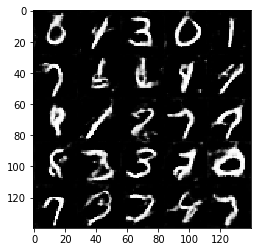

Epoch 4/10... Discriminator Loss: 1.2782... Generator Loss: 0.6354
Epoch 4/10... Discriminator Loss: 1.1956... Generator Loss: 0.7182
Epoch 4/10... Discriminator Loss: 1.0913... Generator Loss: 0.8431
Epoch 4/10... Discriminator Loss: 1.5670... Generator Loss: 0.4379
Epoch 4/10... Discriminator Loss: 1.1484... Generator Loss: 1.3839
Epoch 4/10... Discriminator Loss: 1.5306... Generator Loss: 0.4081
Epoch 4/10... Discriminator Loss: 1.1457... Generator Loss: 0.6790
Epoch 4/10... Discriminator Loss: 1.2767... Generator Loss: 1.3229
Epoch 4/10... Discriminator Loss: 1.2314... Generator Loss: 0.8576
Epoch 4/10... Discriminator Loss: 1.3366... Generator Loss: 0.6584


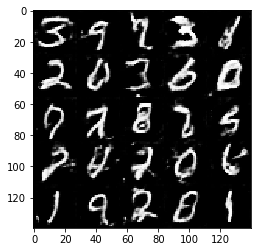

Epoch 4/10... Discriminator Loss: 1.4184... Generator Loss: 0.4669
Epoch 4/10... Discriminator Loss: 1.1866... Generator Loss: 0.9219
Epoch 4/10... Discriminator Loss: 1.4501... Generator Loss: 1.6427
Epoch 4/10... Discriminator Loss: 1.1239... Generator Loss: 1.3379
Epoch 4/10... Discriminator Loss: 1.1192... Generator Loss: 1.0952
Epoch 4/10... Discriminator Loss: 0.8685... Generator Loss: 1.1186
Epoch 4/10... Discriminator Loss: 1.3574... Generator Loss: 0.5652
Epoch 4/10... Discriminator Loss: 1.2584... Generator Loss: 0.6814
Epoch 4/10... Discriminator Loss: 1.4890... Generator Loss: 0.3966
Epoch 4/10... Discriminator Loss: 1.3596... Generator Loss: 0.4859


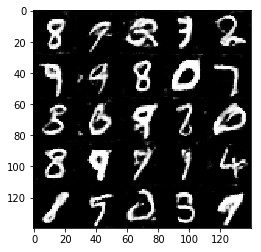

Epoch 4/10... Discriminator Loss: 1.1922... Generator Loss: 0.8686
Epoch 4/10... Discriminator Loss: 1.4686... Generator Loss: 0.8064
Epoch 4/10... Discriminator Loss: 1.2833... Generator Loss: 0.8894
Epoch 5/10... Discriminator Loss: 1.1137... Generator Loss: 1.0836
Epoch 5/10... Discriminator Loss: 1.2935... Generator Loss: 0.7198
Epoch 5/10... Discriminator Loss: 1.2584... Generator Loss: 1.0046
Epoch 5/10... Discriminator Loss: 1.2734... Generator Loss: 0.5843
Epoch 5/10... Discriminator Loss: 1.5541... Generator Loss: 0.4748
Epoch 5/10... Discriminator Loss: 1.0890... Generator Loss: 0.7204
Epoch 5/10... Discriminator Loss: 1.6090... Generator Loss: 0.3839


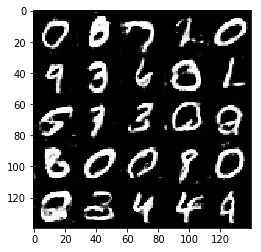

Epoch 5/10... Discriminator Loss: 1.3392... Generator Loss: 0.5264
Epoch 5/10... Discriminator Loss: 1.0520... Generator Loss: 1.3336
Epoch 5/10... Discriminator Loss: 1.1267... Generator Loss: 1.0295
Epoch 5/10... Discriminator Loss: 1.2003... Generator Loss: 1.0473
Epoch 5/10... Discriminator Loss: 1.0953... Generator Loss: 1.3421
Epoch 5/10... Discriminator Loss: 1.1657... Generator Loss: 1.0355
Epoch 5/10... Discriminator Loss: 0.9355... Generator Loss: 1.3508
Epoch 5/10... Discriminator Loss: 1.7407... Generator Loss: 0.4201
Epoch 5/10... Discriminator Loss: 1.6497... Generator Loss: 0.3630
Epoch 5/10... Discriminator Loss: 1.1658... Generator Loss: 1.5110


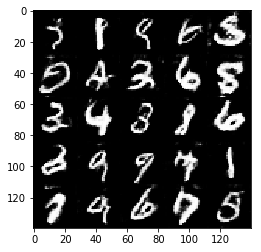

Epoch 5/10... Discriminator Loss: 1.0980... Generator Loss: 0.8566
Epoch 5/10... Discriminator Loss: 1.1695... Generator Loss: 0.9697
Epoch 5/10... Discriminator Loss: 1.1196... Generator Loss: 0.9753
Epoch 5/10... Discriminator Loss: 1.0867... Generator Loss: 1.2838
Epoch 5/10... Discriminator Loss: 1.0018... Generator Loss: 1.2501
Epoch 5/10... Discriminator Loss: 1.0823... Generator Loss: 0.8823
Epoch 5/10... Discriminator Loss: 0.9934... Generator Loss: 1.0494
Epoch 6/10... Discriminator Loss: 1.1373... Generator Loss: 1.0175
Epoch 6/10... Discriminator Loss: 0.7886... Generator Loss: 1.0905
Epoch 6/10... Discriminator Loss: 1.1682... Generator Loss: 0.8336


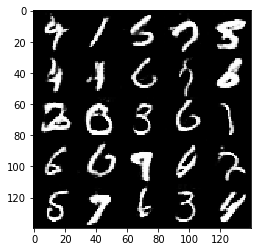

Epoch 6/10... Discriminator Loss: 1.2763... Generator Loss: 0.7078
Epoch 6/10... Discriminator Loss: 1.2225... Generator Loss: 0.7782
Epoch 6/10... Discriminator Loss: 1.2863... Generator Loss: 0.5865
Epoch 6/10... Discriminator Loss: 1.4882... Generator Loss: 0.4240
Epoch 6/10... Discriminator Loss: 1.1991... Generator Loss: 1.0728
Epoch 6/10... Discriminator Loss: 1.3030... Generator Loss: 0.7201
Epoch 6/10... Discriminator Loss: 1.3412... Generator Loss: 0.5686
Epoch 6/10... Discriminator Loss: 1.5514... Generator Loss: 0.4072
Epoch 6/10... Discriminator Loss: 1.0395... Generator Loss: 0.9029
Epoch 6/10... Discriminator Loss: 1.2272... Generator Loss: 0.9489


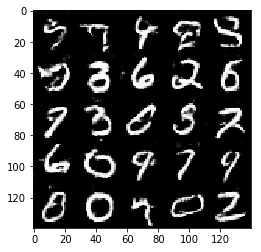

Epoch 6/10... Discriminator Loss: 1.0989... Generator Loss: 0.7869
Epoch 6/10... Discriminator Loss: 1.0189... Generator Loss: 0.7496
Epoch 6/10... Discriminator Loss: 1.1557... Generator Loss: 0.7691
Epoch 6/10... Discriminator Loss: 1.2957... Generator Loss: 0.6863
Epoch 6/10... Discriminator Loss: 2.6180... Generator Loss: 3.8358
Epoch 6/10... Discriminator Loss: 1.1404... Generator Loss: 1.1975
Epoch 6/10... Discriminator Loss: 1.0918... Generator Loss: 0.8861
Epoch 6/10... Discriminator Loss: 1.1118... Generator Loss: 0.7507
Epoch 6/10... Discriminator Loss: 1.1230... Generator Loss: 0.8696
Epoch 6/10... Discriminator Loss: 1.2653... Generator Loss: 0.7284


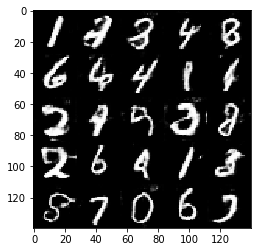

Epoch 7/10... Discriminator Loss: 1.4222... Generator Loss: 0.4468
Epoch 7/10... Discriminator Loss: 1.7757... Generator Loss: 0.3091
Epoch 7/10... Discriminator Loss: 1.0013... Generator Loss: 1.4659
Epoch 7/10... Discriminator Loss: 0.5928... Generator Loss: 1.7201
Epoch 7/10... Discriminator Loss: 1.0261... Generator Loss: 0.8082
Epoch 7/10... Discriminator Loss: 1.3435... Generator Loss: 0.7844
Epoch 7/10... Discriminator Loss: 1.2603... Generator Loss: 0.7097
Epoch 7/10... Discriminator Loss: 1.0590... Generator Loss: 1.3355
Epoch 7/10... Discriminator Loss: 1.1800... Generator Loss: 0.8297
Epoch 7/10... Discriminator Loss: 1.5626... Generator Loss: 0.3866


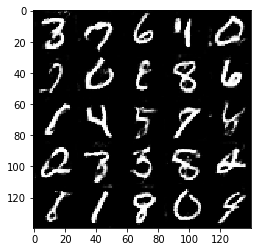

Epoch 7/10... Discriminator Loss: 1.0004... Generator Loss: 1.2706
Epoch 7/10... Discriminator Loss: 1.2505... Generator Loss: 1.3679
Epoch 7/10... Discriminator Loss: 1.1884... Generator Loss: 0.6109
Epoch 7/10... Discriminator Loss: 0.9694... Generator Loss: 1.1252
Epoch 7/10... Discriminator Loss: 1.3019... Generator Loss: 0.4950
Epoch 7/10... Discriminator Loss: 1.2852... Generator Loss: 0.9011
Epoch 7/10... Discriminator Loss: 1.0316... Generator Loss: 1.0945
Epoch 7/10... Discriminator Loss: 1.0716... Generator Loss: 0.8302
Epoch 7/10... Discriminator Loss: 1.1874... Generator Loss: 1.1908
Epoch 7/10... Discriminator Loss: 1.2096... Generator Loss: 0.7509


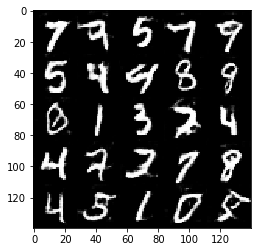

Epoch 7/10... Discriminator Loss: 0.8224... Generator Loss: 1.1985
Epoch 7/10... Discriminator Loss: 1.1364... Generator Loss: 1.1368
Epoch 7/10... Discriminator Loss: 0.9874... Generator Loss: 1.0378
Epoch 8/10... Discriminator Loss: 1.6448... Generator Loss: 2.0610
Epoch 8/10... Discriminator Loss: 1.1708... Generator Loss: 0.9027
Epoch 8/10... Discriminator Loss: 1.2071... Generator Loss: 0.8188
Epoch 8/10... Discriminator Loss: 1.2180... Generator Loss: 1.5390
Epoch 8/10... Discriminator Loss: 1.1519... Generator Loss: 0.9578
Epoch 8/10... Discriminator Loss: 0.8798... Generator Loss: 0.8752
Epoch 8/10... Discriminator Loss: 1.2203... Generator Loss: 1.6234


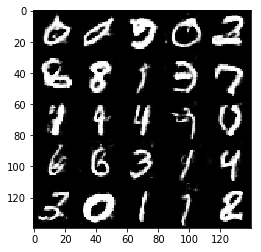

Epoch 8/10... Discriminator Loss: 1.1503... Generator Loss: 0.8152
Epoch 8/10... Discriminator Loss: 1.2098... Generator Loss: 0.7777
Epoch 8/10... Discriminator Loss: 1.1257... Generator Loss: 1.1577
Epoch 8/10... Discriminator Loss: 1.3038... Generator Loss: 2.5052
Epoch 8/10... Discriminator Loss: 1.1282... Generator Loss: 1.2630
Epoch 8/10... Discriminator Loss: 1.1394... Generator Loss: 1.1674
Epoch 8/10... Discriminator Loss: 1.5681... Generator Loss: 1.9833
Epoch 8/10... Discriminator Loss: 1.0697... Generator Loss: 0.9042
Epoch 8/10... Discriminator Loss: 1.2153... Generator Loss: 1.2353
Epoch 8/10... Discriminator Loss: 1.0819... Generator Loss: 0.9216


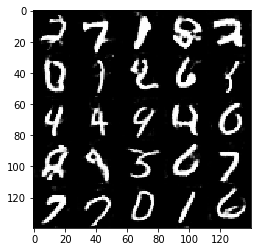

Epoch 8/10... Discriminator Loss: 1.2693... Generator Loss: 1.1102
Epoch 8/10... Discriminator Loss: 1.2618... Generator Loss: 0.5736
Epoch 8/10... Discriminator Loss: 1.0923... Generator Loss: 0.8686
Epoch 8/10... Discriminator Loss: 1.7924... Generator Loss: 0.2872
Epoch 8/10... Discriminator Loss: 1.0190... Generator Loss: 1.2651
Epoch 8/10... Discriminator Loss: 1.0237... Generator Loss: 0.9183
Epoch 8/10... Discriminator Loss: 0.9004... Generator Loss: 0.9383
Epoch 9/10... Discriminator Loss: 1.3941... Generator Loss: 1.6686
Epoch 9/10... Discriminator Loss: 1.4692... Generator Loss: 0.4576
Epoch 9/10... Discriminator Loss: 1.8759... Generator Loss: 0.3074


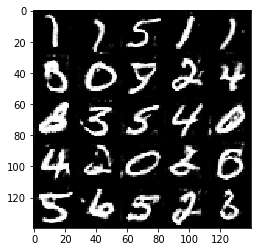

Epoch 9/10... Discriminator Loss: 1.2328... Generator Loss: 0.7863
Epoch 9/10... Discriminator Loss: 1.2591... Generator Loss: 1.6647
Epoch 9/10... Discriminator Loss: 1.0765... Generator Loss: 1.4650
Epoch 9/10... Discriminator Loss: 1.0009... Generator Loss: 1.4838
Epoch 9/10... Discriminator Loss: 1.2271... Generator Loss: 1.4886
Epoch 9/10... Discriminator Loss: 1.2507... Generator Loss: 0.5365
Epoch 9/10... Discriminator Loss: 1.2631... Generator Loss: 0.7262
Epoch 9/10... Discriminator Loss: 1.7816... Generator Loss: 0.3053
Epoch 9/10... Discriminator Loss: 1.4173... Generator Loss: 0.4882
Epoch 9/10... Discriminator Loss: 1.1507... Generator Loss: 1.0139


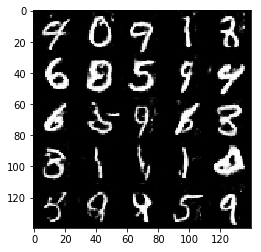

Epoch 9/10... Discriminator Loss: 0.8442... Generator Loss: 1.0042
Epoch 9/10... Discriminator Loss: 1.2831... Generator Loss: 2.3105
Epoch 9/10... Discriminator Loss: 0.8931... Generator Loss: 1.5252
Epoch 9/10... Discriminator Loss: 1.1806... Generator Loss: 1.0362
Epoch 9/10... Discriminator Loss: 1.7932... Generator Loss: 0.2991
Epoch 9/10... Discriminator Loss: 1.0235... Generator Loss: 1.1707
Epoch 9/10... Discriminator Loss: 1.2515... Generator Loss: 0.7090
Epoch 9/10... Discriminator Loss: 1.0929... Generator Loss: 0.8597
Epoch 9/10... Discriminator Loss: 1.2957... Generator Loss: 1.0226
Epoch 9/10... Discriminator Loss: 0.9899... Generator Loss: 0.9074


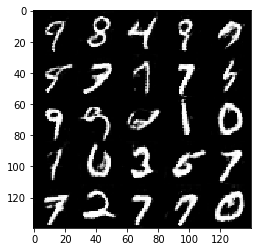

Epoch 10/10... Discriminator Loss: 1.4377... Generator Loss: 2.2134
Epoch 10/10... Discriminator Loss: 1.0548... Generator Loss: 0.7714
Epoch 10/10... Discriminator Loss: 1.4437... Generator Loss: 0.4411
Epoch 10/10... Discriminator Loss: 1.2886... Generator Loss: 1.8680
Epoch 10/10... Discriminator Loss: 0.9838... Generator Loss: 1.0351
Epoch 10/10... Discriminator Loss: 1.2818... Generator Loss: 0.5442
Epoch 10/10... Discriminator Loss: 0.9475... Generator Loss: 1.4401
Epoch 10/10... Discriminator Loss: 1.1956... Generator Loss: 0.7228
Epoch 10/10... Discriminator Loss: 1.8705... Generator Loss: 0.2714
Epoch 10/10... Discriminator Loss: 0.9842... Generator Loss: 0.7752


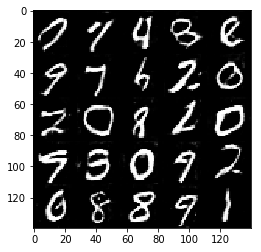

Epoch 10/10... Discriminator Loss: 0.9301... Generator Loss: 0.9179
Epoch 10/10... Discriminator Loss: 1.5581... Generator Loss: 0.4399
Epoch 10/10... Discriminator Loss: 0.8281... Generator Loss: 1.1511
Epoch 10/10... Discriminator Loss: 0.9099... Generator Loss: 1.2614
Epoch 10/10... Discriminator Loss: 1.4133... Generator Loss: 0.4964
Epoch 10/10... Discriminator Loss: 0.9958... Generator Loss: 1.2406
Epoch 10/10... Discriminator Loss: 1.0343... Generator Loss: 0.9629
Epoch 10/10... Discriminator Loss: 1.1149... Generator Loss: 0.6741
Epoch 10/10... Discriminator Loss: 1.1463... Generator Loss: 0.9084
Epoch 10/10... Discriminator Loss: 1.0468... Generator Loss: 0.7069


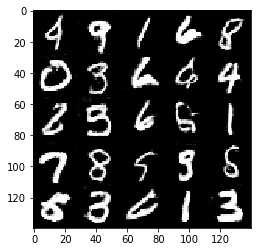

Epoch 10/10... Discriminator Loss: 0.9395... Generator Loss: 1.3308
Epoch 10/10... Discriminator Loss: 0.7464... Generator Loss: 1.3866
Epoch 10/10... Discriminator Loss: 1.3022... Generator Loss: 0.5560
Epoch 10/10... Discriminator Loss: 0.8520... Generator Loss: 1.2006


In [13]:
batch_size = 256
z_dim = 100
learning_rate = 0.005
beta1 = 0.4


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 10

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/5... Discriminator Loss: 2.8537... Generator Loss: 0.2921
Epoch 1/5... Discriminator Loss: 1.9231... Generator Loss: 0.4986
Epoch 1/5... Discriminator Loss: 0.9169... Generator Loss: 1.8423
Epoch 1/5... Discriminator Loss: 0.9639... Generator Loss: 1.9735
Epoch 1/5... Discriminator Loss: 1.8783... Generator Loss: 3.9563
Epoch 1/5... Discriminator Loss: 1.8607... Generator Loss: 5.2035
Epoch 1/5... Discriminator Loss: 1.8816... Generator Loss: 0.4462
Epoch 1/5... Discriminator Loss: 0.9734... Generator Loss: 1.2330
Epoch 1/5... Discriminator Loss: 0.6816... Generator Loss: 1.8421
Epoch 1/5... Discriminator Loss: 0.7058... Generator Loss: 1.0582


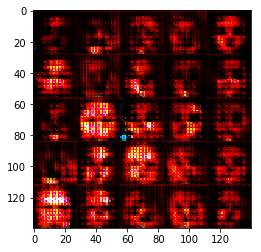

Epoch 1/5... Discriminator Loss: 1.3601... Generator Loss: 0.5383
Epoch 1/5... Discriminator Loss: 0.2584... Generator Loss: 2.7265
Epoch 1/5... Discriminator Loss: 0.0249... Generator Loss: 4.0498
Epoch 1/5... Discriminator Loss: 2.4003... Generator Loss: 0.6240
Epoch 1/5... Discriminator Loss: 1.7604... Generator Loss: 0.4790
Epoch 1/5... Discriminator Loss: 1.2760... Generator Loss: 3.0381
Epoch 1/5... Discriminator Loss: 2.1139... Generator Loss: 3.6135
Epoch 1/5... Discriminator Loss: 2.0251... Generator Loss: 0.3924
Epoch 1/5... Discriminator Loss: 1.6486... Generator Loss: 0.4208
Epoch 1/5... Discriminator Loss: 0.7761... Generator Loss: 0.8174


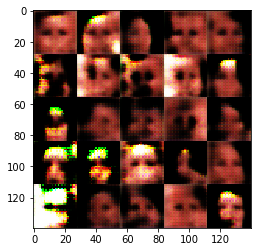

Epoch 1/5... Discriminator Loss: 0.9413... Generator Loss: 1.1676
Epoch 1/5... Discriminator Loss: 1.0661... Generator Loss: 0.9911
Epoch 1/5... Discriminator Loss: 1.4084... Generator Loss: 0.6621
Epoch 1/5... Discriminator Loss: 1.2999... Generator Loss: 0.8566
Epoch 1/5... Discriminator Loss: 1.4589... Generator Loss: 0.3991
Epoch 1/5... Discriminator Loss: 1.0647... Generator Loss: 0.6898
Epoch 1/5... Discriminator Loss: 1.0221... Generator Loss: 0.8548
Epoch 1/5... Discriminator Loss: 1.6924... Generator Loss: 0.4006
Epoch 1/5... Discriminator Loss: 1.3383... Generator Loss: 1.4174
Epoch 1/5... Discriminator Loss: 1.3480... Generator Loss: 0.7364


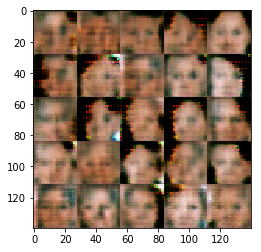

Epoch 1/5... Discriminator Loss: 1.1397... Generator Loss: 1.0203
Epoch 1/5... Discriminator Loss: 1.0443... Generator Loss: 1.4700
Epoch 1/5... Discriminator Loss: 1.3567... Generator Loss: 0.7118
Epoch 1/5... Discriminator Loss: 1.2596... Generator Loss: 0.8001
Epoch 1/5... Discriminator Loss: 1.2320... Generator Loss: 0.8245
Epoch 1/5... Discriminator Loss: 1.2187... Generator Loss: 0.8237
Epoch 1/5... Discriminator Loss: 1.3078... Generator Loss: 0.9039
Epoch 1/5... Discriminator Loss: 1.7439... Generator Loss: 1.8064
Epoch 1/5... Discriminator Loss: 1.3595... Generator Loss: 0.6477
Epoch 1/5... Discriminator Loss: 1.4325... Generator Loss: 0.9226


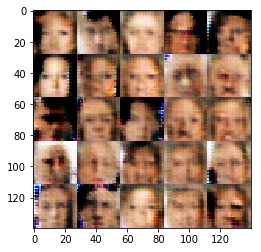

Epoch 1/5... Discriminator Loss: 1.3353... Generator Loss: 0.9615
Epoch 1/5... Discriminator Loss: 1.2195... Generator Loss: 1.0770
Epoch 1/5... Discriminator Loss: 1.3386... Generator Loss: 0.8422
Epoch 1/5... Discriminator Loss: 1.2740... Generator Loss: 0.8480
Epoch 1/5... Discriminator Loss: 1.3882... Generator Loss: 0.8402
Epoch 1/5... Discriminator Loss: 1.2001... Generator Loss: 0.9067
Epoch 1/5... Discriminator Loss: 2.0613... Generator Loss: 1.9826
Epoch 1/5... Discriminator Loss: 1.3931... Generator Loss: 0.7062
Epoch 1/5... Discriminator Loss: 1.3956... Generator Loss: 0.6657
Epoch 1/5... Discriminator Loss: 1.3155... Generator Loss: 0.7798


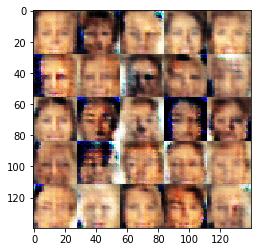

Epoch 1/5... Discriminator Loss: 1.5012... Generator Loss: 0.5529
Epoch 1/5... Discriminator Loss: 1.6715... Generator Loss: 1.3060
Epoch 1/5... Discriminator Loss: 1.3787... Generator Loss: 0.7186
Epoch 1/5... Discriminator Loss: 1.2805... Generator Loss: 0.7453
Epoch 1/5... Discriminator Loss: 1.1196... Generator Loss: 0.8162
Epoch 1/5... Discriminator Loss: 1.1863... Generator Loss: 0.7438
Epoch 1/5... Discriminator Loss: 1.2782... Generator Loss: 0.6513
Epoch 1/5... Discriminator Loss: 1.3317... Generator Loss: 0.9039
Epoch 1/5... Discriminator Loss: 1.3425... Generator Loss: 0.7483
Epoch 1/5... Discriminator Loss: 1.4423... Generator Loss: 0.7356


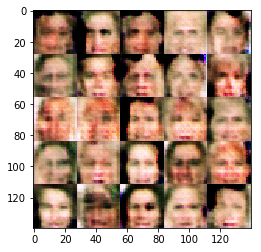

Epoch 1/5... Discriminator Loss: 1.3994... Generator Loss: 0.6620
Epoch 1/5... Discriminator Loss: 1.3463... Generator Loss: 0.7441
Epoch 1/5... Discriminator Loss: 1.3845... Generator Loss: 0.6533
Epoch 1/5... Discriminator Loss: 1.4369... Generator Loss: 0.7440
Epoch 1/5... Discriminator Loss: 1.4463... Generator Loss: 0.8079
Epoch 1/5... Discriminator Loss: 1.3080... Generator Loss: 0.5861
Epoch 1/5... Discriminator Loss: 1.3157... Generator Loss: 1.0217
Epoch 1/5... Discriminator Loss: 1.2448... Generator Loss: 0.6990
Epoch 1/5... Discriminator Loss: 1.3749... Generator Loss: 0.6294
Epoch 1/5... Discriminator Loss: 1.3494... Generator Loss: 0.7237


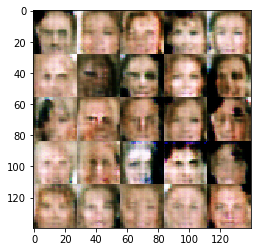

Epoch 1/5... Discriminator Loss: 1.7326... Generator Loss: 1.5824
Epoch 1/5... Discriminator Loss: 1.0090... Generator Loss: 0.8629
Epoch 1/5... Discriminator Loss: 1.3697... Generator Loss: 0.7998
Epoch 1/5... Discriminator Loss: 1.2530... Generator Loss: 0.9504
Epoch 1/5... Discriminator Loss: 1.3033... Generator Loss: 0.7202
Epoch 1/5... Discriminator Loss: 1.5871... Generator Loss: 0.6737
Epoch 1/5... Discriminator Loss: 1.2957... Generator Loss: 0.7848
Epoch 1/5... Discriminator Loss: 1.2976... Generator Loss: 0.8103
Epoch 1/5... Discriminator Loss: 1.3744... Generator Loss: 0.7591
Epoch 2/5... Discriminator Loss: 1.3271... Generator Loss: 0.9866


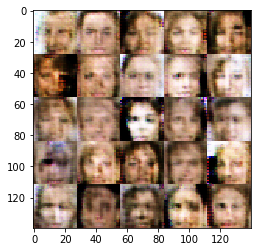

Epoch 2/5... Discriminator Loss: 1.3944... Generator Loss: 1.0186
Epoch 2/5... Discriminator Loss: 1.0440... Generator Loss: 1.3258
Epoch 2/5... Discriminator Loss: 1.4624... Generator Loss: 1.3786
Epoch 2/5... Discriminator Loss: 1.2454... Generator Loss: 0.7454
Epoch 2/5... Discriminator Loss: 1.3678... Generator Loss: 0.6307
Epoch 2/5... Discriminator Loss: 2.0136... Generator Loss: 1.9504
Epoch 2/5... Discriminator Loss: 1.3747... Generator Loss: 0.9155
Epoch 2/5... Discriminator Loss: 1.3321... Generator Loss: 0.8314
Epoch 2/5... Discriminator Loss: 1.4681... Generator Loss: 1.1393
Epoch 2/5... Discriminator Loss: 1.3317... Generator Loss: 0.9507


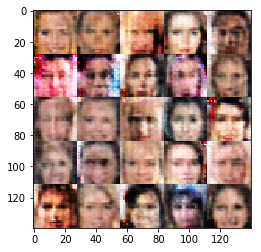

Epoch 2/5... Discriminator Loss: 1.3402... Generator Loss: 0.9197
Epoch 2/5... Discriminator Loss: 1.5091... Generator Loss: 0.5968
Epoch 2/5... Discriminator Loss: 1.3994... Generator Loss: 0.7209
Epoch 2/5... Discriminator Loss: 1.1563... Generator Loss: 1.0332
Epoch 2/5... Discriminator Loss: 2.1020... Generator Loss: 0.2338
Epoch 2/5... Discriminator Loss: 1.9583... Generator Loss: 0.2382
Epoch 2/5... Discriminator Loss: 1.3106... Generator Loss: 0.7645
Epoch 2/5... Discriminator Loss: 1.3948... Generator Loss: 0.6816
Epoch 2/5... Discriminator Loss: 1.3774... Generator Loss: 0.7483
Epoch 2/5... Discriminator Loss: 1.3982... Generator Loss: 0.9418


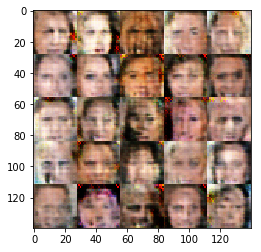

Epoch 2/5... Discriminator Loss: 1.3183... Generator Loss: 0.7484
Epoch 2/5... Discriminator Loss: 1.3328... Generator Loss: 0.6154
Epoch 2/5... Discriminator Loss: 1.3373... Generator Loss: 0.8368
Epoch 2/5... Discriminator Loss: 1.4519... Generator Loss: 0.9722
Epoch 2/5... Discriminator Loss: 1.3361... Generator Loss: 0.7556
Epoch 2/5... Discriminator Loss: 1.3434... Generator Loss: 0.8444
Epoch 2/5... Discriminator Loss: 1.4505... Generator Loss: 0.9549
Epoch 2/5... Discriminator Loss: 1.4389... Generator Loss: 0.6800
Epoch 2/5... Discriminator Loss: 1.3991... Generator Loss: 0.8795
Epoch 2/5... Discriminator Loss: 1.3777... Generator Loss: 0.6683


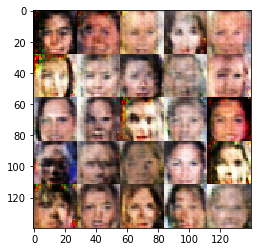

Epoch 2/5... Discriminator Loss: 1.3596... Generator Loss: 0.7602
Epoch 2/5... Discriminator Loss: 1.3610... Generator Loss: 0.8419
Epoch 2/5... Discriminator Loss: 1.2010... Generator Loss: 0.6960
Epoch 2/5... Discriminator Loss: 1.4463... Generator Loss: 0.8230
Epoch 2/5... Discriminator Loss: 1.3522... Generator Loss: 0.7721
Epoch 2/5... Discriminator Loss: 1.3930... Generator Loss: 0.8774
Epoch 2/5... Discriminator Loss: 1.3461... Generator Loss: 0.5938
Epoch 2/5... Discriminator Loss: 1.3040... Generator Loss: 0.7659
Epoch 2/5... Discriminator Loss: 1.3607... Generator Loss: 0.7634
Epoch 2/5... Discriminator Loss: 1.3276... Generator Loss: 0.6382


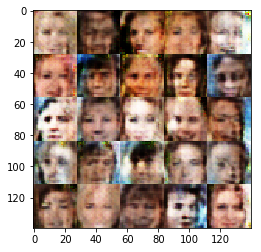

Epoch 2/5... Discriminator Loss: 1.2739... Generator Loss: 0.8351
Epoch 2/5... Discriminator Loss: 1.3799... Generator Loss: 0.6621
Epoch 2/5... Discriminator Loss: 1.4173... Generator Loss: 0.9213
Epoch 2/5... Discriminator Loss: 1.2670... Generator Loss: 0.6647
Epoch 2/5... Discriminator Loss: 1.3322... Generator Loss: 0.8555
Epoch 2/5... Discriminator Loss: 1.3335... Generator Loss: 0.7385
Epoch 2/5... Discriminator Loss: 1.3272... Generator Loss: 0.7074
Epoch 2/5... Discriminator Loss: 1.2958... Generator Loss: 0.7836
Epoch 2/5... Discriminator Loss: 1.3393... Generator Loss: 0.7087
Epoch 2/5... Discriminator Loss: 1.3036... Generator Loss: 0.6476


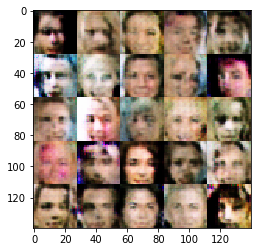

Epoch 2/5... Discriminator Loss: 1.2191... Generator Loss: 0.6995
Epoch 2/5... Discriminator Loss: 1.2941... Generator Loss: 0.7631
Epoch 2/5... Discriminator Loss: 1.3771... Generator Loss: 0.9548
Epoch 2/5... Discriminator Loss: 1.3644... Generator Loss: 0.8551
Epoch 2/5... Discriminator Loss: 1.2638... Generator Loss: 0.9630
Epoch 2/5... Discriminator Loss: 1.4199... Generator Loss: 0.6664
Epoch 2/5... Discriminator Loss: 1.2597... Generator Loss: 0.6668
Epoch 2/5... Discriminator Loss: 1.3009... Generator Loss: 0.9174
Epoch 2/5... Discriminator Loss: 1.3298... Generator Loss: 0.7792
Epoch 2/5... Discriminator Loss: 1.4184... Generator Loss: 0.6817


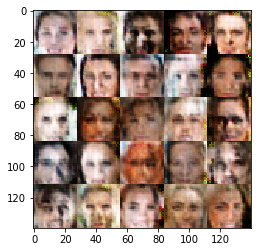

Epoch 2/5... Discriminator Loss: 1.2945... Generator Loss: 0.8628
Epoch 2/5... Discriminator Loss: 1.3876... Generator Loss: 0.5605
Epoch 2/5... Discriminator Loss: 1.3072... Generator Loss: 0.7427
Epoch 2/5... Discriminator Loss: 1.3607... Generator Loss: 0.6949
Epoch 2/5... Discriminator Loss: 1.3472... Generator Loss: 0.7114
Epoch 2/5... Discriminator Loss: 1.3454... Generator Loss: 0.9805
Epoch 2/5... Discriminator Loss: 1.3222... Generator Loss: 0.7191
Epoch 2/5... Discriminator Loss: 1.4959... Generator Loss: 0.6018
Epoch 2/5... Discriminator Loss: 1.4253... Generator Loss: 0.8394
Epoch 2/5... Discriminator Loss: 1.2874... Generator Loss: 0.7958


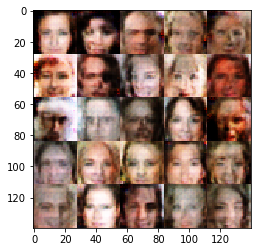

Epoch 2/5... Discriminator Loss: 1.3066... Generator Loss: 0.6621
Epoch 2/5... Discriminator Loss: 1.3849... Generator Loss: 0.6796
Epoch 2/5... Discriminator Loss: 1.4335... Generator Loss: 0.7612
Epoch 2/5... Discriminator Loss: 1.3939... Generator Loss: 0.6019
Epoch 2/5... Discriminator Loss: 1.5165... Generator Loss: 1.1420
Epoch 2/5... Discriminator Loss: 1.4343... Generator Loss: 0.6906
Epoch 2/5... Discriminator Loss: 1.3448... Generator Loss: 0.7965
Epoch 2/5... Discriminator Loss: 1.4300... Generator Loss: 0.5727
Epoch 3/5... Discriminator Loss: 1.3375... Generator Loss: 0.7978
Epoch 3/5... Discriminator Loss: 1.3214... Generator Loss: 0.8744


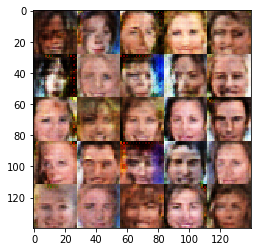

Epoch 3/5... Discriminator Loss: 1.3427... Generator Loss: 0.6537
Epoch 3/5... Discriminator Loss: 1.3611... Generator Loss: 0.8821
Epoch 3/5... Discriminator Loss: 1.3414... Generator Loss: 0.7105
Epoch 3/5... Discriminator Loss: 1.3256... Generator Loss: 0.7813
Epoch 3/5... Discriminator Loss: 1.3867... Generator Loss: 0.8185
Epoch 3/5... Discriminator Loss: 1.3878... Generator Loss: 0.7647
Epoch 3/5... Discriminator Loss: 1.4582... Generator Loss: 0.6342
Epoch 3/5... Discriminator Loss: 1.4619... Generator Loss: 0.5703
Epoch 3/5... Discriminator Loss: 1.3953... Generator Loss: 0.7196
Epoch 3/5... Discriminator Loss: 1.3095... Generator Loss: 0.7382


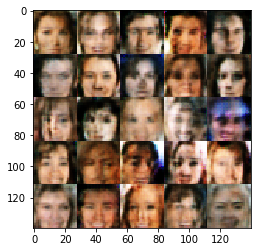

Epoch 3/5... Discriminator Loss: 1.3180... Generator Loss: 0.6124
Epoch 3/5... Discriminator Loss: 1.3642... Generator Loss: 0.7789
Epoch 3/5... Discriminator Loss: 1.3336... Generator Loss: 0.8745
Epoch 3/5... Discriminator Loss: 1.3565... Generator Loss: 0.8057
Epoch 3/5... Discriminator Loss: 1.4986... Generator Loss: 0.5658
Epoch 3/5... Discriminator Loss: 1.4211... Generator Loss: 0.8711
Epoch 3/5... Discriminator Loss: 1.3781... Generator Loss: 1.0613
Epoch 3/5... Discriminator Loss: 1.4029... Generator Loss: 0.6540
Epoch 3/5... Discriminator Loss: 1.2850... Generator Loss: 0.7074
Epoch 3/5... Discriminator Loss: 1.5027... Generator Loss: 1.2055


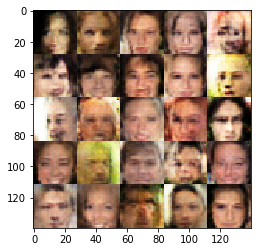

Epoch 3/5... Discriminator Loss: 1.4058... Generator Loss: 1.0500
Epoch 3/5... Discriminator Loss: 1.3551... Generator Loss: 0.8261
Epoch 3/5... Discriminator Loss: 1.3312... Generator Loss: 0.6929
Epoch 3/5... Discriminator Loss: 1.3142... Generator Loss: 0.8337
Epoch 3/5... Discriminator Loss: 1.3643... Generator Loss: 0.7540
Epoch 3/5... Discriminator Loss: 1.3812... Generator Loss: 0.5887
Epoch 3/5... Discriminator Loss: 1.4064... Generator Loss: 0.6956
Epoch 3/5... Discriminator Loss: 1.4202... Generator Loss: 0.6847
Epoch 3/5... Discriminator Loss: 1.3520... Generator Loss: 0.8426
Epoch 3/5... Discriminator Loss: 1.3777... Generator Loss: 0.6526


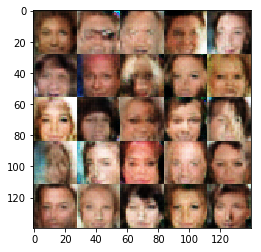

Epoch 3/5... Discriminator Loss: 1.3409... Generator Loss: 0.7185
Epoch 3/5... Discriminator Loss: 1.3351... Generator Loss: 0.7959
Epoch 3/5... Discriminator Loss: 1.4560... Generator Loss: 0.5691
Epoch 3/5... Discriminator Loss: 1.3562... Generator Loss: 0.8463
Epoch 3/5... Discriminator Loss: 1.3842... Generator Loss: 0.7358
Epoch 3/5... Discriminator Loss: 1.3578... Generator Loss: 0.7721
Epoch 3/5... Discriminator Loss: 1.3899... Generator Loss: 0.7329
Epoch 3/5... Discriminator Loss: 1.4132... Generator Loss: 0.7007
Epoch 3/5... Discriminator Loss: 1.3254... Generator Loss: 0.9305
Epoch 3/5... Discriminator Loss: 1.3980... Generator Loss: 0.7409


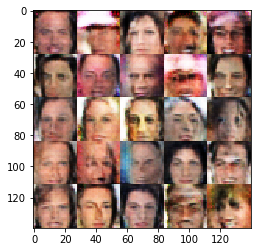

Epoch 3/5... Discriminator Loss: 1.3614... Generator Loss: 0.6930
Epoch 3/5... Discriminator Loss: 1.2923... Generator Loss: 0.7008
Epoch 3/5... Discriminator Loss: 1.2711... Generator Loss: 0.9040
Epoch 3/5... Discriminator Loss: 1.3918... Generator Loss: 0.6345
Epoch 3/5... Discriminator Loss: 1.4587... Generator Loss: 0.8460
Epoch 3/5... Discriminator Loss: 1.5184... Generator Loss: 0.5211
Epoch 3/5... Discriminator Loss: 1.3143... Generator Loss: 0.6906
Epoch 3/5... Discriminator Loss: 1.2914... Generator Loss: 0.7374
Epoch 3/5... Discriminator Loss: 1.4002... Generator Loss: 0.6218
Epoch 3/5... Discriminator Loss: 1.3221... Generator Loss: 0.9270


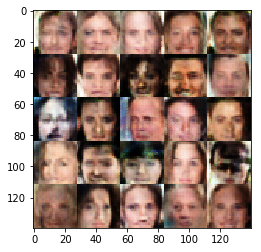

Epoch 3/5... Discriminator Loss: 1.3407... Generator Loss: 0.8091
Epoch 3/5... Discriminator Loss: 1.3784... Generator Loss: 0.9761
Epoch 3/5... Discriminator Loss: 1.3168... Generator Loss: 0.7555
Epoch 3/5... Discriminator Loss: 1.3603... Generator Loss: 0.7164
Epoch 3/5... Discriminator Loss: 1.4184... Generator Loss: 0.5582
Epoch 3/5... Discriminator Loss: 1.4331... Generator Loss: 0.6243
Epoch 3/5... Discriminator Loss: 1.3812... Generator Loss: 0.7422
Epoch 3/5... Discriminator Loss: 1.4209... Generator Loss: 0.6240
Epoch 3/5... Discriminator Loss: 1.2709... Generator Loss: 0.8295
Epoch 3/5... Discriminator Loss: 1.4289... Generator Loss: 0.6524


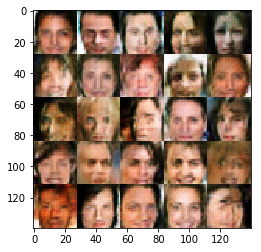

Epoch 3/5... Discriminator Loss: 1.2976... Generator Loss: 0.7258
Epoch 3/5... Discriminator Loss: 1.3951... Generator Loss: 0.5997
Epoch 3/5... Discriminator Loss: 1.3426... Generator Loss: 0.7099
Epoch 3/5... Discriminator Loss: 1.6144... Generator Loss: 1.4700
Epoch 3/5... Discriminator Loss: 1.3594... Generator Loss: 0.8919
Epoch 3/5... Discriminator Loss: 1.3752... Generator Loss: 0.7276
Epoch 3/5... Discriminator Loss: 1.3956... Generator Loss: 0.6373
Epoch 3/5... Discriminator Loss: 1.3253... Generator Loss: 0.8692
Epoch 3/5... Discriminator Loss: 1.3847... Generator Loss: 0.8038
Epoch 3/5... Discriminator Loss: 1.3456... Generator Loss: 0.8030


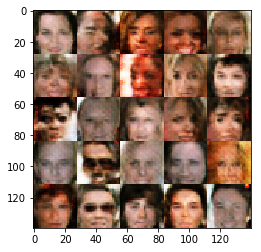

Epoch 3/5... Discriminator Loss: 1.3534... Generator Loss: 0.8316
Epoch 3/5... Discriminator Loss: 1.3270... Generator Loss: 0.8736
Epoch 3/5... Discriminator Loss: 1.3362... Generator Loss: 0.8131
Epoch 3/5... Discriminator Loss: 1.2669... Generator Loss: 0.7872
Epoch 3/5... Discriminator Loss: 1.3170... Generator Loss: 0.7406
Epoch 3/5... Discriminator Loss: 1.2885... Generator Loss: 0.7508
Epoch 3/5... Discriminator Loss: 1.3078... Generator Loss: 0.8289
Epoch 4/5... Discriminator Loss: 1.3188... Generator Loss: 0.7687
Epoch 4/5... Discriminator Loss: 1.3159... Generator Loss: 0.7840
Epoch 4/5... Discriminator Loss: 1.3103... Generator Loss: 0.8702


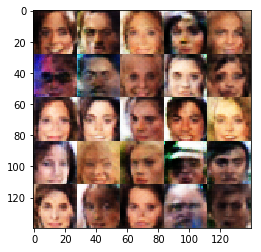

Epoch 4/5... Discriminator Loss: 1.3804... Generator Loss: 0.8356
Epoch 4/5... Discriminator Loss: 1.3441... Generator Loss: 0.8213
Epoch 4/5... Discriminator Loss: 1.4234... Generator Loss: 0.5270
Epoch 4/5... Discriminator Loss: 1.3892... Generator Loss: 1.0511
Epoch 4/5... Discriminator Loss: 1.3081... Generator Loss: 0.8283
Epoch 4/5... Discriminator Loss: 1.5245... Generator Loss: 1.3418
Epoch 4/5... Discriminator Loss: 1.2948... Generator Loss: 0.9650
Epoch 4/5... Discriminator Loss: 1.3906... Generator Loss: 1.0432
Epoch 4/5... Discriminator Loss: 1.4052... Generator Loss: 0.8103
Epoch 4/5... Discriminator Loss: 1.3710... Generator Loss: 0.7667


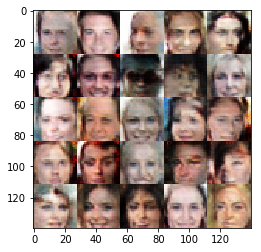

Epoch 4/5... Discriminator Loss: 1.3571... Generator Loss: 0.8357
Epoch 4/5... Discriminator Loss: 1.3407... Generator Loss: 0.6484
Epoch 4/5... Discriminator Loss: 1.3548... Generator Loss: 0.6936
Epoch 4/5... Discriminator Loss: 1.3650... Generator Loss: 0.6562
Epoch 4/5... Discriminator Loss: 1.3804... Generator Loss: 0.6046
Epoch 4/5... Discriminator Loss: 1.4418... Generator Loss: 0.9517
Epoch 4/5... Discriminator Loss: 1.3586... Generator Loss: 0.6133
Epoch 4/5... Discriminator Loss: 1.3245... Generator Loss: 0.7872
Epoch 4/5... Discriminator Loss: 1.3787... Generator Loss: 0.6764
Epoch 4/5... Discriminator Loss: 1.3368... Generator Loss: 0.7856


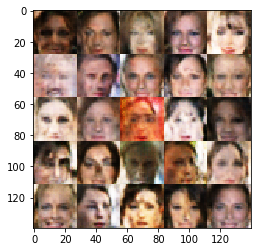

Epoch 4/5... Discriminator Loss: 1.3801... Generator Loss: 0.9372
Epoch 4/5... Discriminator Loss: 1.3370... Generator Loss: 0.7796
Epoch 4/5... Discriminator Loss: 1.3142... Generator Loss: 0.8981
Epoch 4/5... Discriminator Loss: 1.3796... Generator Loss: 0.7328
Epoch 4/5... Discriminator Loss: 1.3040... Generator Loss: 0.7909
Epoch 4/5... Discriminator Loss: 1.3510... Generator Loss: 0.7385
Epoch 4/5... Discriminator Loss: 1.2803... Generator Loss: 0.6974
Epoch 4/5... Discriminator Loss: 1.4661... Generator Loss: 0.8765
Epoch 4/5... Discriminator Loss: 1.3190... Generator Loss: 0.6909
Epoch 4/5... Discriminator Loss: 1.3749... Generator Loss: 0.7276


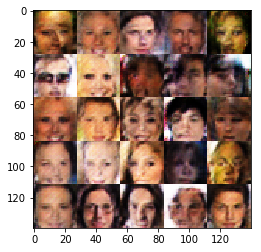

Epoch 4/5... Discriminator Loss: 1.3123... Generator Loss: 0.7628
Epoch 4/5... Discriminator Loss: 1.3414... Generator Loss: 0.7618
Epoch 4/5... Discriminator Loss: 1.3446... Generator Loss: 0.9427
Epoch 4/5... Discriminator Loss: 1.4138... Generator Loss: 0.8467
Epoch 4/5... Discriminator Loss: 1.3033... Generator Loss: 0.8065
Epoch 4/5... Discriminator Loss: 1.3936... Generator Loss: 0.7761
Epoch 4/5... Discriminator Loss: 1.5300... Generator Loss: 0.5208
Epoch 4/5... Discriminator Loss: 1.3676... Generator Loss: 0.6834
Epoch 4/5... Discriminator Loss: 1.3397... Generator Loss: 0.7196
Epoch 4/5... Discriminator Loss: 1.3427... Generator Loss: 0.9219


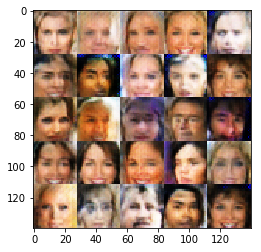

Epoch 4/5... Discriminator Loss: 1.3080... Generator Loss: 0.7621
Epoch 4/5... Discriminator Loss: 1.3167... Generator Loss: 0.7243
Epoch 4/5... Discriminator Loss: 1.3840... Generator Loss: 1.0789
Epoch 4/5... Discriminator Loss: 1.3599... Generator Loss: 0.7901
Epoch 4/5... Discriminator Loss: 1.3356... Generator Loss: 0.6545
Epoch 4/5... Discriminator Loss: 1.2960... Generator Loss: 0.6723
Epoch 4/5... Discriminator Loss: 1.3723... Generator Loss: 0.9955
Epoch 4/5... Discriminator Loss: 1.3363... Generator Loss: 0.6702
Epoch 4/5... Discriminator Loss: 1.2999... Generator Loss: 0.7064
Epoch 4/5... Discriminator Loss: 1.4432... Generator Loss: 0.5739


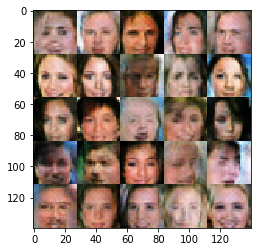

Epoch 4/5... Discriminator Loss: 1.3480... Generator Loss: 0.6573
Epoch 4/5... Discriminator Loss: 1.3397... Generator Loss: 0.7233
Epoch 4/5... Discriminator Loss: 1.3424... Generator Loss: 0.7614
Epoch 4/5... Discriminator Loss: 1.3924... Generator Loss: 1.0664
Epoch 4/5... Discriminator Loss: 1.3456... Generator Loss: 0.7517
Epoch 4/5... Discriminator Loss: 1.4122... Generator Loss: 1.0207
Epoch 4/5... Discriminator Loss: 1.3661... Generator Loss: 0.6520
Epoch 4/5... Discriminator Loss: 1.3280... Generator Loss: 0.7875
Epoch 4/5... Discriminator Loss: 1.3159... Generator Loss: 0.9245
Epoch 4/5... Discriminator Loss: 1.3756... Generator Loss: 0.7844


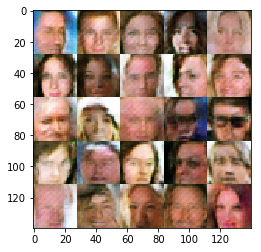

Epoch 4/5... Discriminator Loss: 1.4443... Generator Loss: 0.5107
Epoch 4/5... Discriminator Loss: 1.4092... Generator Loss: 0.7021
Epoch 4/5... Discriminator Loss: 1.3348... Generator Loss: 0.7516
Epoch 4/5... Discriminator Loss: 1.3454... Generator Loss: 0.7721
Epoch 4/5... Discriminator Loss: 1.3711... Generator Loss: 0.6349
Epoch 4/5... Discriminator Loss: 1.3364... Generator Loss: 0.7810
Epoch 4/5... Discriminator Loss: 1.3842... Generator Loss: 0.6730
Epoch 4/5... Discriminator Loss: 1.3725... Generator Loss: 0.9698
Epoch 4/5... Discriminator Loss: 1.3094... Generator Loss: 0.8012
Epoch 4/5... Discriminator Loss: 1.5035... Generator Loss: 1.3418


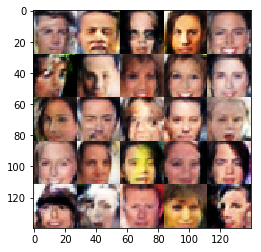

Epoch 4/5... Discriminator Loss: 1.3042... Generator Loss: 0.7642
Epoch 4/5... Discriminator Loss: 1.3994... Generator Loss: 0.6958
Epoch 4/5... Discriminator Loss: 1.3352... Generator Loss: 0.7189
Epoch 4/5... Discriminator Loss: 1.3932... Generator Loss: 0.9153
Epoch 4/5... Discriminator Loss: 1.3812... Generator Loss: 0.8841
Epoch 4/5... Discriminator Loss: 1.3634... Generator Loss: 0.8382
Epoch 5/5... Discriminator Loss: 1.3631... Generator Loss: 0.8009
Epoch 5/5... Discriminator Loss: 1.3218... Generator Loss: 0.8181
Epoch 5/5... Discriminator Loss: 1.3379... Generator Loss: 0.7715
Epoch 5/5... Discriminator Loss: 1.3777... Generator Loss: 0.6779


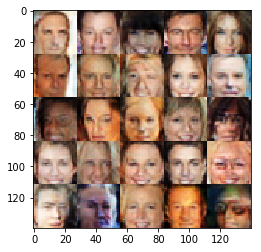

Epoch 5/5... Discriminator Loss: 1.3822... Generator Loss: 0.6583
Epoch 5/5... Discriminator Loss: 1.3197... Generator Loss: 0.7016
Epoch 5/5... Discriminator Loss: 1.4396... Generator Loss: 1.2069
Epoch 5/5... Discriminator Loss: 1.3908... Generator Loss: 0.7285
Epoch 5/5... Discriminator Loss: 1.3860... Generator Loss: 0.7636
Epoch 5/5... Discriminator Loss: 1.3081... Generator Loss: 0.7046
Epoch 5/5... Discriminator Loss: 1.3801... Generator Loss: 0.7456
Epoch 5/5... Discriminator Loss: 1.3621... Generator Loss: 0.8413
Epoch 5/5... Discriminator Loss: 1.3557... Generator Loss: 0.6859
Epoch 5/5... Discriminator Loss: 1.3917... Generator Loss: 0.9392


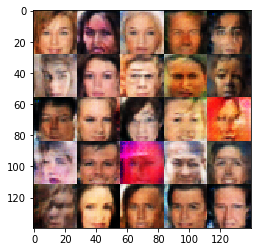

Epoch 5/5... Discriminator Loss: 1.3920... Generator Loss: 0.8106
Epoch 5/5... Discriminator Loss: 1.3133... Generator Loss: 0.9838
Epoch 5/5... Discriminator Loss: 1.3955... Generator Loss: 1.0399
Epoch 5/5... Discriminator Loss: 1.3162... Generator Loss: 0.8113
Epoch 5/5... Discriminator Loss: 1.3649... Generator Loss: 0.6275
Epoch 5/5... Discriminator Loss: 1.3252... Generator Loss: 0.8047
Epoch 5/5... Discriminator Loss: 1.3453... Generator Loss: 0.7299
Epoch 5/5... Discriminator Loss: 1.3930... Generator Loss: 0.5873
Epoch 5/5... Discriminator Loss: 1.3165... Generator Loss: 0.8143
Epoch 5/5... Discriminator Loss: 1.3654... Generator Loss: 0.6586


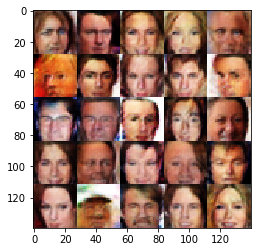

Epoch 5/5... Discriminator Loss: 1.3616... Generator Loss: 0.7197
Epoch 5/5... Discriminator Loss: 1.3490... Generator Loss: 0.6532
Epoch 5/5... Discriminator Loss: 1.2744... Generator Loss: 0.7474
Epoch 5/5... Discriminator Loss: 1.3488... Generator Loss: 0.7613
Epoch 5/5... Discriminator Loss: 1.3286... Generator Loss: 0.7416
Epoch 5/5... Discriminator Loss: 1.3496... Generator Loss: 0.7253
Epoch 5/5... Discriminator Loss: 1.3522... Generator Loss: 0.7102
Epoch 5/5... Discriminator Loss: 1.3391... Generator Loss: 0.8160
Epoch 5/5... Discriminator Loss: 1.4138... Generator Loss: 0.9067
Epoch 5/5... Discriminator Loss: 1.3855... Generator Loss: 0.8573


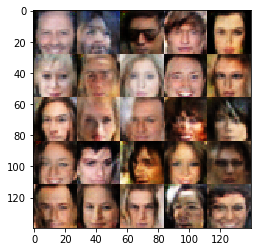

Epoch 5/5... Discriminator Loss: 1.4141... Generator Loss: 0.6877
Epoch 5/5... Discriminator Loss: 1.3791... Generator Loss: 0.7851
Epoch 5/5... Discriminator Loss: 1.3481... Generator Loss: 0.6390
Epoch 5/5... Discriminator Loss: 1.3098... Generator Loss: 0.7446
Epoch 5/5... Discriminator Loss: 1.3344... Generator Loss: 0.7536
Epoch 5/5... Discriminator Loss: 1.3497... Generator Loss: 0.7538
Epoch 5/5... Discriminator Loss: 1.3622... Generator Loss: 0.9187
Epoch 5/5... Discriminator Loss: 1.3283... Generator Loss: 1.0030
Epoch 5/5... Discriminator Loss: 1.3834... Generator Loss: 0.8395
Epoch 5/5... Discriminator Loss: 1.3861... Generator Loss: 0.7557


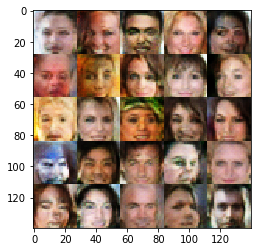

Epoch 5/5... Discriminator Loss: 1.3976... Generator Loss: 1.0388
Epoch 5/5... Discriminator Loss: 1.3557... Generator Loss: 0.7933
Epoch 5/5... Discriminator Loss: 1.3196... Generator Loss: 0.6657
Epoch 5/5... Discriminator Loss: 1.3732... Generator Loss: 0.9946
Epoch 5/5... Discriminator Loss: 1.3477... Generator Loss: 0.7341
Epoch 5/5... Discriminator Loss: 1.3373... Generator Loss: 0.7464
Epoch 5/5... Discriminator Loss: 1.3417... Generator Loss: 0.6710
Epoch 5/5... Discriminator Loss: 1.3691... Generator Loss: 0.7264
Epoch 5/5... Discriminator Loss: 1.3428... Generator Loss: 0.8243
Epoch 5/5... Discriminator Loss: 1.3641... Generator Loss: 0.7603


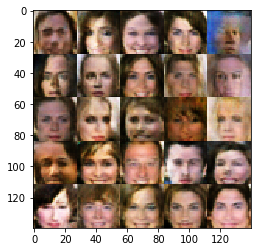

Epoch 5/5... Discriminator Loss: 1.3267... Generator Loss: 0.7634
Epoch 5/5... Discriminator Loss: 1.3201... Generator Loss: 0.6490
Epoch 5/5... Discriminator Loss: 1.3378... Generator Loss: 0.7479
Epoch 5/5... Discriminator Loss: 1.4665... Generator Loss: 0.4786
Epoch 5/5... Discriminator Loss: 1.3880... Generator Loss: 0.5935
Epoch 5/5... Discriminator Loss: 1.3651... Generator Loss: 0.6109
Epoch 5/5... Discriminator Loss: 1.3517... Generator Loss: 0.9083
Epoch 5/5... Discriminator Loss: 1.4219... Generator Loss: 0.5697
Epoch 5/5... Discriminator Loss: 1.3719... Generator Loss: 0.6303
Epoch 5/5... Discriminator Loss: 1.3929... Generator Loss: 0.6668


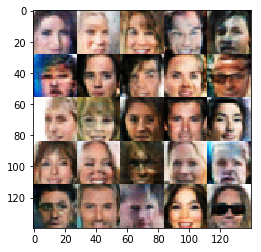

Epoch 5/5... Discriminator Loss: 1.4067... Generator Loss: 0.7583
Epoch 5/5... Discriminator Loss: 1.4204... Generator Loss: 1.0367
Epoch 5/5... Discriminator Loss: 1.3840... Generator Loss: 0.8230
Epoch 5/5... Discriminator Loss: 1.3623... Generator Loss: 0.8854
Epoch 5/5... Discriminator Loss: 1.3930... Generator Loss: 0.8042
Epoch 5/5... Discriminator Loss: 1.3981... Generator Loss: 0.6569
Epoch 5/5... Discriminator Loss: 1.3264... Generator Loss: 0.6376
Epoch 5/5... Discriminator Loss: 1.3563... Generator Loss: 0.7535
Epoch 5/5... Discriminator Loss: 1.3234... Generator Loss: 0.6688
Epoch 5/5... Discriminator Loss: 1.3743... Generator Loss: 0.8837


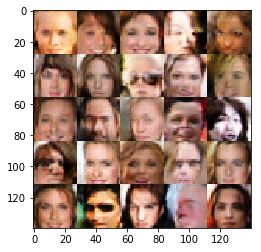

Epoch 5/5... Discriminator Loss: 1.2870... Generator Loss: 0.8034
Epoch 5/5... Discriminator Loss: 1.3268... Generator Loss: 0.7177
Epoch 5/5... Discriminator Loss: 1.4059... Generator Loss: 0.6439
Epoch 5/5... Discriminator Loss: 1.3897... Generator Loss: 0.6672
Epoch 5/5... Discriminator Loss: 1.3319... Generator Loss: 0.6896


In [14]:
batch_size = 256
z_dim = 100
learning_rate = 0.005
beta1 = 0.4


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 5

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.